# Python Final Project : Predicting the costs of used cars

## Done By: Hardik Raja (https://github.com/hardiksraja)

## Task:
The data (and its description) can also be downloaded from here:
https://www.machinehack.com/course/predicting-the-costs-of-used-cars-hackathon-by-imarticus/  
Develop a machine learning model using only the training set. 
This is an end to end activity. The entire ML pipeline must be shown with an explanation. 

## Dataset Description :
Size of training set: 6,019 records

Size of test set: 1,234 records

#### FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

## Notes:
1. There are two datasets provided Train and Test; I will be using Train dataset for training and validating model using train-test split
as well as cross-validation. The test dataset will be used as an input (set of independent variables) to predict the output
(dependent variable - Price of used car)

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')
from pandas import set_option
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.neighbors import KNeighborsRegressor
import copy as cp

In [2]:
#Importing the Datasets
df_train = pd.read_excel("D:\Aegis\PPT_StudyMaterial_new\Python\Final_Project\Participants_Data_Used_Cars\Data_Train.xlsx")
df_test = pd.read_excel("D:\Aegis\PPT_StudyMaterial_new\Python\Final_Project\Participants_Data_Used_Cars\Data_Test.xlsx")

# 1. Performing EDA - Exploratory Data Analysis

In [3]:
#Identifying the number of features in the Datasets
print("\n\nNumber of features in the individual datasets :\n",'*' * 40)
print("\nTrain Set : \n",'-' * 20, len(df_train.columns))
print("\nTest Set : \n",'-' * 20,len(df_test.columns))



Number of features in the individual datasets :
 ****************************************

Train Set : 
 -------------------- 13

Test Set : 
 -------------------- 12


In [4]:
#Identifying the features in the Datasets
print("\n\nFeatures in the individual datasets are as following :\n",'*' * 40)
print("\nTrain Set : \n",'-' * 20, list(df_train.columns))
print("\nTest Set : \n",'-' * 20,list(df_test.columns))



Features in the individual datasets are as following :
 ****************************************

Train Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

Test Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']


In [5]:
#Identifying the data types of features provided in train and test set
print("\n\nDatatypes of features in the individual datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", df_train.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",df_test.dtypes)



Datatypes of features in the individual datasets :
 ########################################

Training Set : 
 -------------------- 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Test Set : 
 -------------------- 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object


In [6]:
#Identifying the shape of train and test set
print("\nShape of Train Set : \n",'-' * 20,df_train.shape)
print("\nShape of Test Set : \n",'-' * 20,df_test.shape)


Shape of Train Set : 
 -------------------- (6019, 13)

Shape of Test Set : 
 -------------------- (1234, 12)


In [7]:
#Identifying if there are any empty/null cells or Nans
print("\n\nEmpty cells or Nans in the individual datasets :\n",'*' * 40)
print("\nTrain Set : \n",'-' * 20,df_train.isnull().values.any())
print("\nTest Set : \n",'-' * 20,df_test.isnull().values.any())



Empty cells or Nans in the individual datasets :
 ****************************************

Train Set : 
 -------------------- True

Test Set : 
 -------------------- True


In [8]:
#Identifying the nummber of empty/null cells or NaNs by features
print("\n\nNumber of Empty cells or Nans in the datasets :\n",'*' * 40)
print("\nTrain Set : \n",'-' * 20,"\n", df_train.isnull().sum())
print("\nTest Set : \n",'-' * 20,"\n",df_test.isnull().sum())



Number of Empty cells or Nans in the datasets :
 ****************************************

Train Set : 
 -------------------- 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Test Set : 
 -------------------- 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [9]:
set_option('precision',2) #The values in output of describe are rounded to 2 decimal places

In [10]:
#Check statistics for train data
df_train.describe(include = 'all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.00,6.02e+03,6019,6019,6019,6017,5983,5983,5977.00,824,6019.00
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.36,5.87e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.28,NaN,9.48
std,NaN,NaN,3.27,9.13e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN,11.19
min,NaN,NaN,1998.00,1.71e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.44
25%,NaN,NaN,2011.00,3.40e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,3.50
50%,NaN,NaN,2014.00,5.30e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,5.64
75%,NaN,NaN,2016.00,7.30e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,9.95


In [11]:
#Check statistics for test data
df_test.describe(include = 'all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
count,1234,1234,1234.00,1234.00,1234,1234,1234,1234,1224,1224,1223.00,182
unique,768,11,NaN,NaN,4,2,4,301,104,249,NaN,162
top,Maruti Alto LXi,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,34.1 Lakh
freq,9,159,NaN,NaN,647,905,1023,35,126,45,NaN,3
mean,NaN,NaN,2013.40,58507.29,NaN,NaN,NaN,NaN,NaN,NaN,5.28,NaN
std,NaN,NaN,3.18,35598.70,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN
min,NaN,NaN,1996.00,1000.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN
25%,NaN,NaN,2011.00,34000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN
50%,NaN,NaN,2014.00,54572.50,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN
75%,NaN,NaN,2016.00,75000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN


In [12]:
#Create x_train and y_train from the training data
x_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

# 2. Data Cleaning

#### 1. Encode the categorical labels via Label Encoder
1. Name
2. Location
3. Year (Is Categorical in this context as car edition belongs to a year)
4. Fuel Type
5. Transmission
6. Owner_Type

#### 2. Conversion required for below features
7. Mileage - Its continous, need to remove kmpl, convert to float64
8. Engine -Its continous, need to remove CC, convert to int64
9. Power - Its continous, need to remove bhp, convert to float64
10. Seats - Its numercial and discrete, convert to int64
11. New_Price - Its numercial and continous; convert to float64 and remove lakh

#### 3. Conversion is not required for below features
12. Price - Its numercial and continous
13. Kilometers_Driven - Its numercial and continous

In [13]:
#function for converting columns having value in crores to lacs
def func_convertToLacs(x):
    """ function for converting columns having value in crores to lacs"""
    if(str(x).find('Cr')!=-1):
        returnvalue = float(str(x)[:-3])*100
        returnvalue = str(round(returnvalue,2)) + " Lakh"
        return returnvalue
    else: return x

In [14]:
#Train set
df_train['New_Price'].replace(np.nan, 0.0, inplace= True)
df_train['New_Price'] = df_train['New_Price'].apply(func_convertToLacs)
df_train['New_Price'].replace(0.0, np.nan, inplace= True)

df_train['Mileage']=pd.to_numeric(df_train['Mileage'].astype(str).str[:-5], errors='coerce')
df_train['Power']=pd.to_numeric(df_train['Power'].astype(str).str[:-4], errors='coerce')
df_train['New_Price']=pd.to_numeric(df_train['New_Price'].astype(str).str[:-5], errors='coerce')
df_train['Year']=df_train['Year'].astype(object) #As Year is categorical variable in this context
df_train['Engine']=pd.to_numeric(df_train['Engine'].astype(str).str[:-2], errors='coerce')

#Test set
df_test['New_Price'].replace(np.nan, 0.0, inplace= True)
df_test['New_Price'] = df_test['New_Price'].apply(func_convertToLacs)
df_test['New_Price'].replace(0.0, np.nan, inplace= True)

df_test['Mileage']=pd.to_numeric(df_test['Mileage'].astype(str).str[:-5], errors='coerce')
df_test['Power']=pd.to_numeric(df_test['Power'].astype(str).str[:-4], errors='coerce')
df_test['New_Price']=pd.to_numeric(df_test['New_Price'].astype(str).str[:-5], errors='coerce')
df_test['Year']=df_test['Year'].astype(object) #As Year is categorical variable in this context
df_test['Engine']=pd.to_numeric(df_test['Engine'].astype(str).str[:-2], errors='coerce')

In [15]:
#Encoding Categorical Variables

#For Train
df_train_obj = df_train.select_dtypes(exclude=['int64','float64'])
df_train_num = df_train.select_dtypes(include=['int64','float64'])
df_train_encoded = df_train_obj.apply(LabelEncoder().fit_transform)
df_train_2 = df_train_num.join(df_train_encoded)

#For Test
df_test_obj = df_test.select_dtypes(exclude=['int64','float64'])
df_test_num = df_test.select_dtypes(include=['int64','float64'])
df_test_encoded = df_test_obj.apply(LabelEncoder().fit_transform)
df_test_2=df_test_num.join(df_test_encoded)

# 3. Data Visvualization

## 3.1 Univariate Analysis for all features having continous data

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [17]:
data_continous = df_train_2[['Kilometers_Driven','Mileage','Engine','Power','New_Price']]

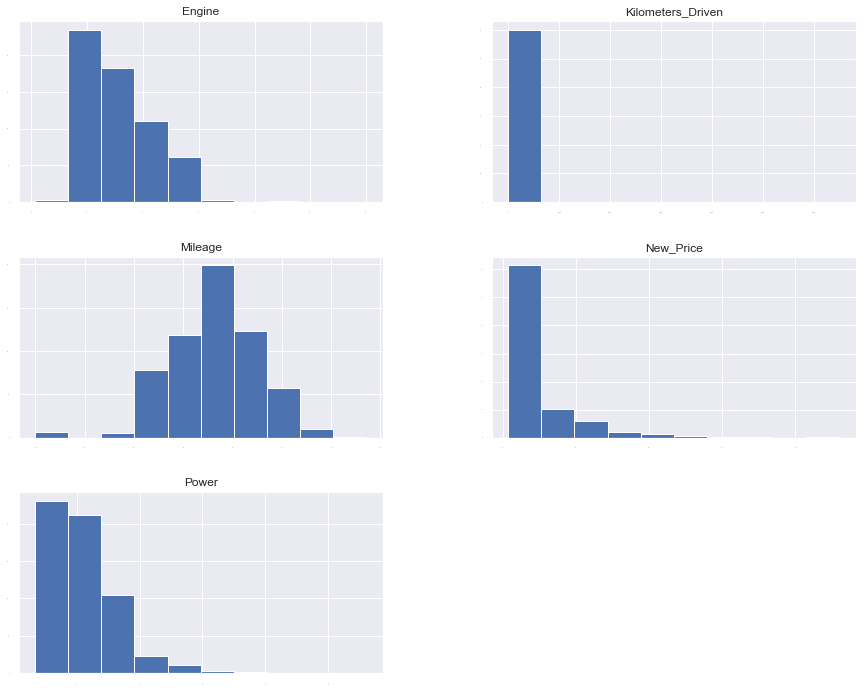

In [18]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
data_continous.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(15,12) )
plt.show()

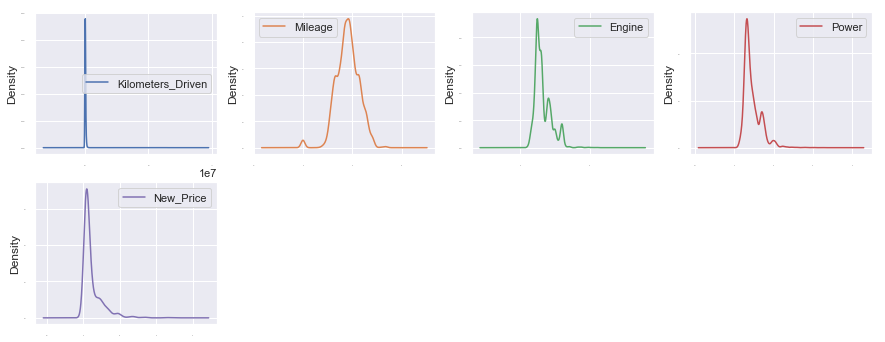

In [19]:
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

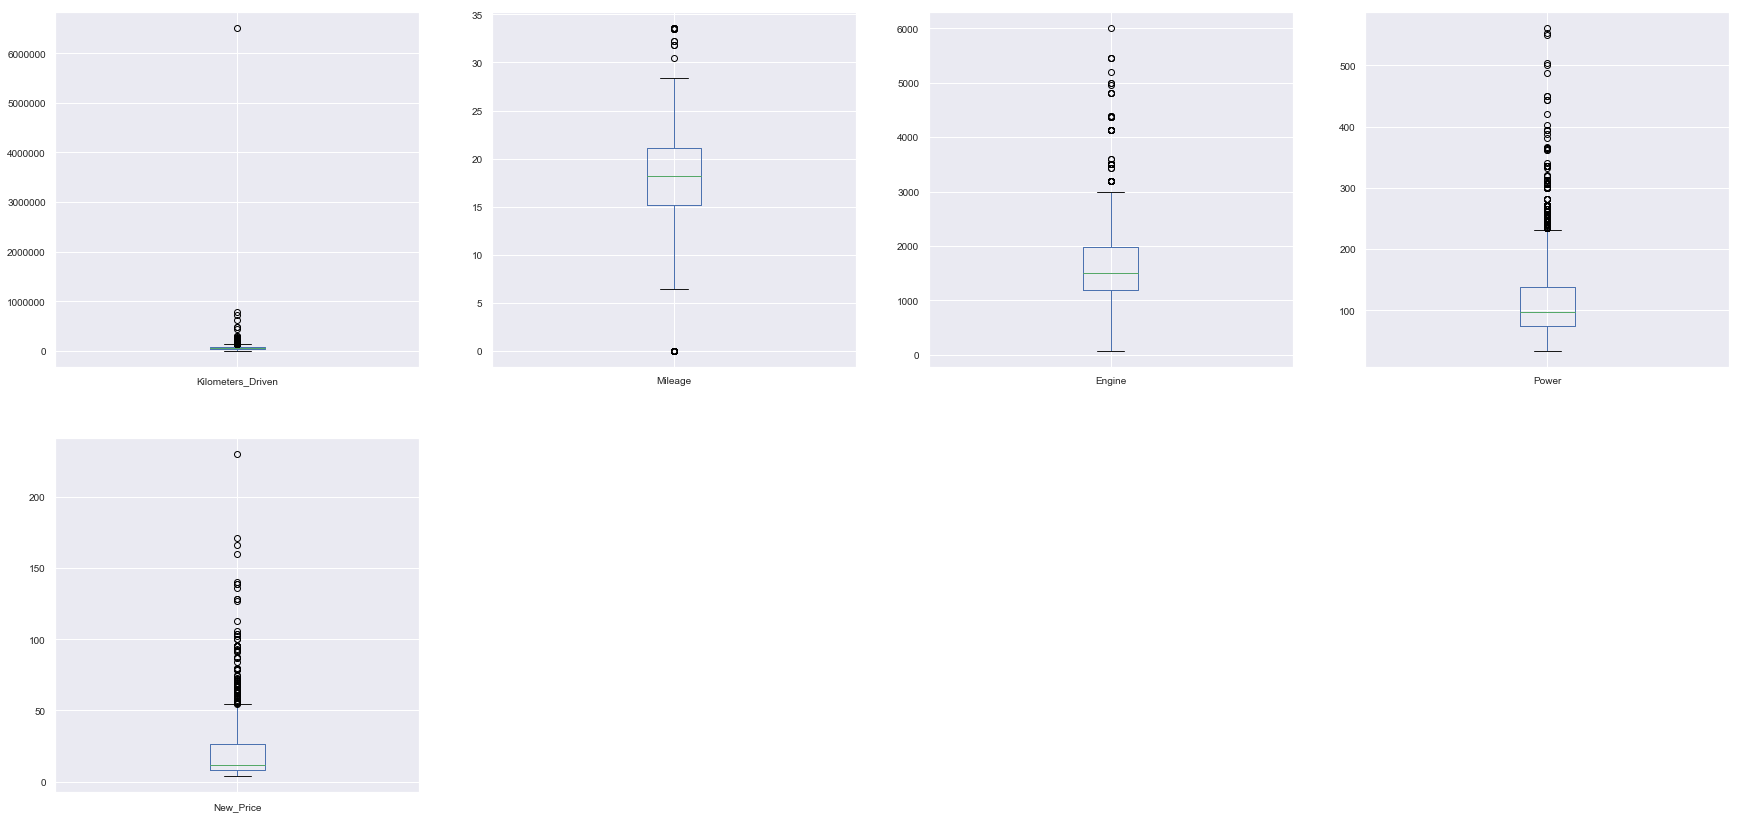

In [20]:
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

#### The data visvualization indicates there are outliers in Kilometers_Driven, Mileage, Engine, Power and New Price

## 3.2 Bivariate Analysis for all features having continous data

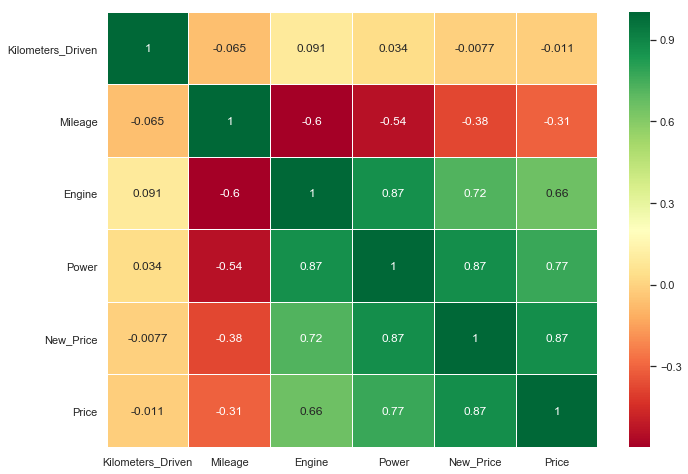

In [21]:
#Heat map of all continuous variables, ignored the categorical variables
data_continous_temp = data_continous.copy()
data_continous_temp['Price'] = df_train_2.Price
sns.heatmap(data_continous_temp.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()
# Engine - 0.66, Power - 0.77, New_Price - 0.87 are highly co-related

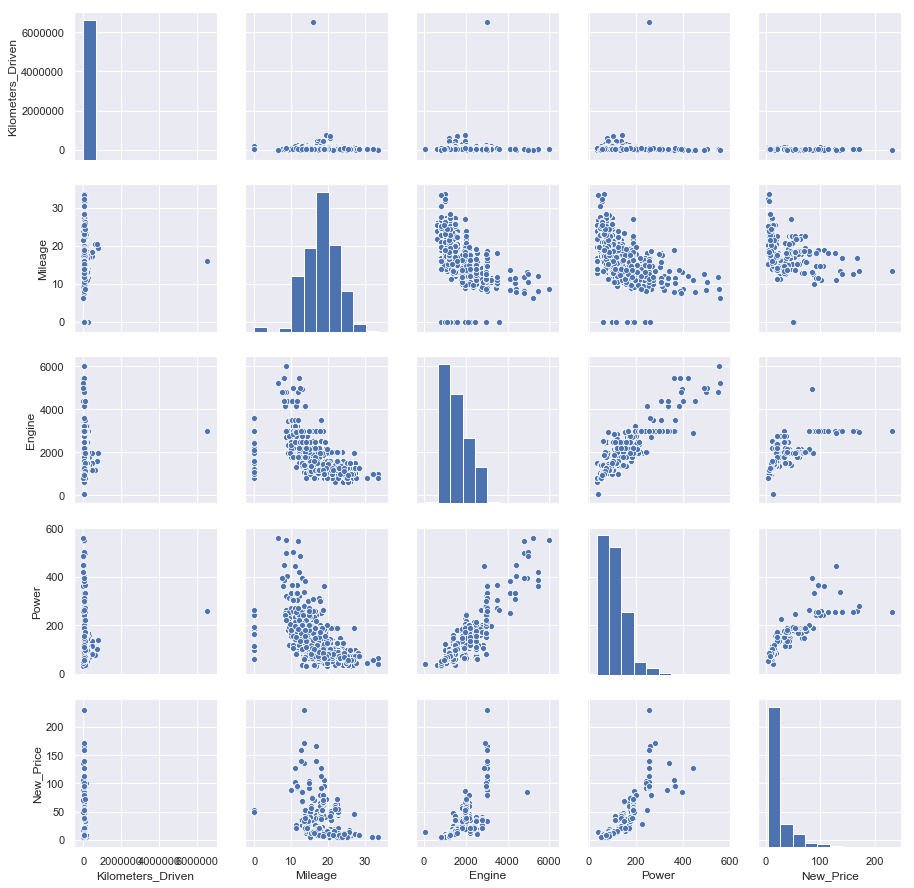

In [22]:
# Scatter plot matrix using seaborn library
sns.pairplot(data_continous)
plt.show()

#### The data visvualization indicates there are outliers in Kilometers_Driven, Mileage, Engine, Power and New Price;
#### Also Engine is moderalely corelated to Price (0.66)
#### where Power (0.77) and New_Price (0.87) are highly co-related

## 3.3 Univariate Analysis for all features having categorical data

In [23]:
data_categorical = df_train_2[['Name','Location','Year','Fuel_Type','Transmission','Owner_Type']]

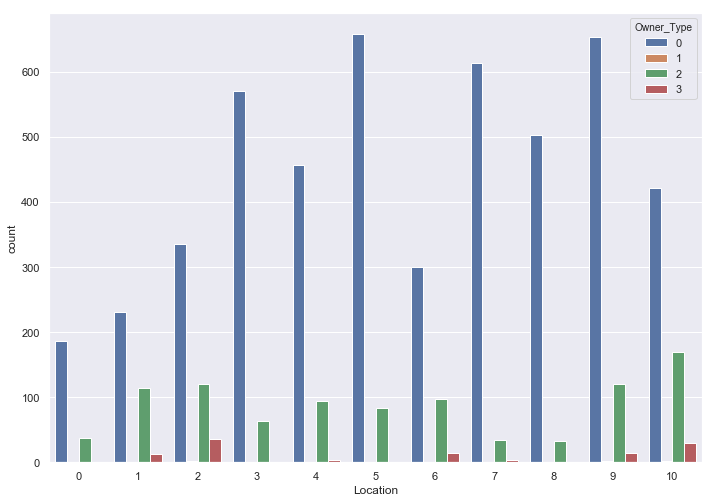

In [24]:
sns.countplot(x = data_categorical.Location, hue = data_categorical.Owner_Type)
plt.show()

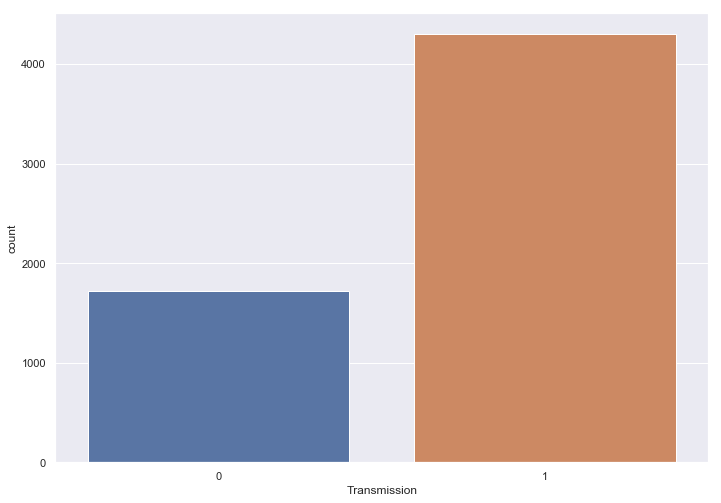

In [25]:
sns.countplot(x = data_categorical.Transmission)
plt.show()

## 3.4 Bivariate Analysis for all features having categorical data with respect to prize

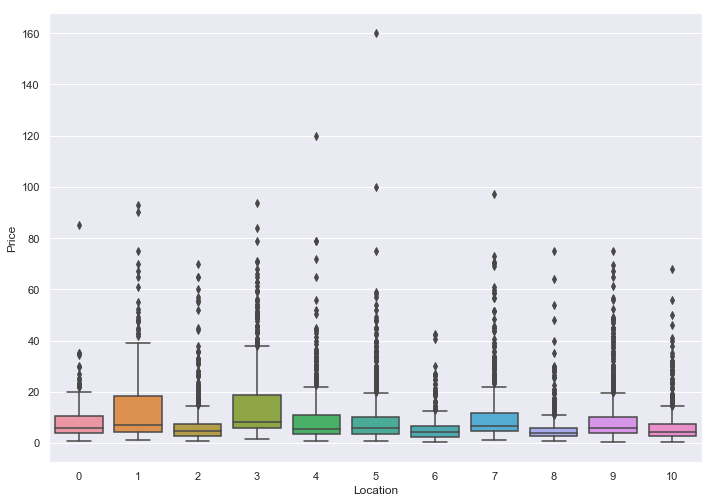

In [26]:
sns.boxplot(x = data_categorical.Location, y = data_continous_temp.Price)
plt.show()

 # 4. Data Preprocessing

## 4.1 Missing Value Treatment (Imputing Missing Values)

In [27]:
# Mark Missing Values

#For Train Data
df_train_2['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00
df_train_2['Seats'].replace(0.00, np.nan, inplace= True) #As Seats can't be 0.00

#For Train Data
df_test_2['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00
df_test_2['Seats'].replace(0.00, np.nan, inplace= True) #As Seats can't be 0.00

In [28]:
#No of null values for each feature
print(df_train_2.isnull().sum(), "\n\n\n",df_train_2.isnull().sum())

Kilometers_Driven       0
Mileage                70
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
Name                    0
Location                0
Year                    0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64 


 Kilometers_Driven       0
Mileage                70
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
Name                    0
Location                0
Year                    0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64


In [29]:
df_train_3 = df_train_2.copy()
df_test_3 = df_test_2.copy()

In [30]:
#Attend to missing values
df_train_3['Mileage']=df_train_3['Mileage'].fillna(df_train_3['Mileage'].median())
df_train_3['Engine']=df_train_3['Engine'].fillna(df_train_3['Engine'].median())
df_train_3['Power']=df_train_3['Power'].fillna(df_train_3['Power'].median())
df_train_3['Seats']=df_train_3['Seats'].fillna(df_train_3['Seats'].median())
df_train_3['New_Price']=df_train_3['New_Price'].fillna(df_train_3['New_Price'].mean())

df_test_3['Mileage']=df_test_3['Mileage'].fillna(df_test_3['Mileage'].median())
df_test_3['Engine']=df_test_3['Engine'].fillna(df_test_3['Engine'].median())
df_test_3['Power']=df_test_3['Power'].fillna(df_test_3['Power'].median())
df_test_3['Seats']=df_test_3['Seats'].fillna(df_test_3['Seats'].median())
df_test_3['New_Price']=df_test_3['New_Price'].fillna(df_test_3['New_Price'].mean())

In [31]:
#No of null values for each feature
print(df_train_3.isnull().sum(), "\n\n\n",df_train_3.isnull().sum())

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Name                 0
Location             0
Year                 0
Fuel_Type            0
Transmission         0
Owner_Type           0
dtype: int64 


 Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Name                 0
Location             0
Year                 0
Fuel_Type            0
Transmission         0
Owner_Type           0
dtype: int64


In [32]:
#Covert Seats and Engine feature to int
df_train_3['Seats']=df_train_3['Seats'].astype(int)
df_train_3['Engine']=df_train_3['Engine'].astype(int)

df_test_3['Seats']=df_test_3['Seats'].astype(int)
df_test_3['Engine']=df_test_3['Engine'].astype(int)

## 4.2 Outlier Detection and Treatment

In [33]:
data_continous = df_train_3[['Kilometers_Driven','Mileage','Engine','Power']]

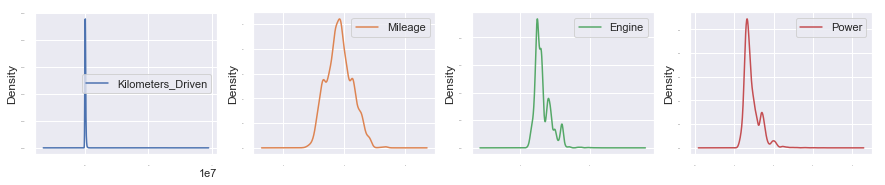

In [34]:
#Density Plot
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

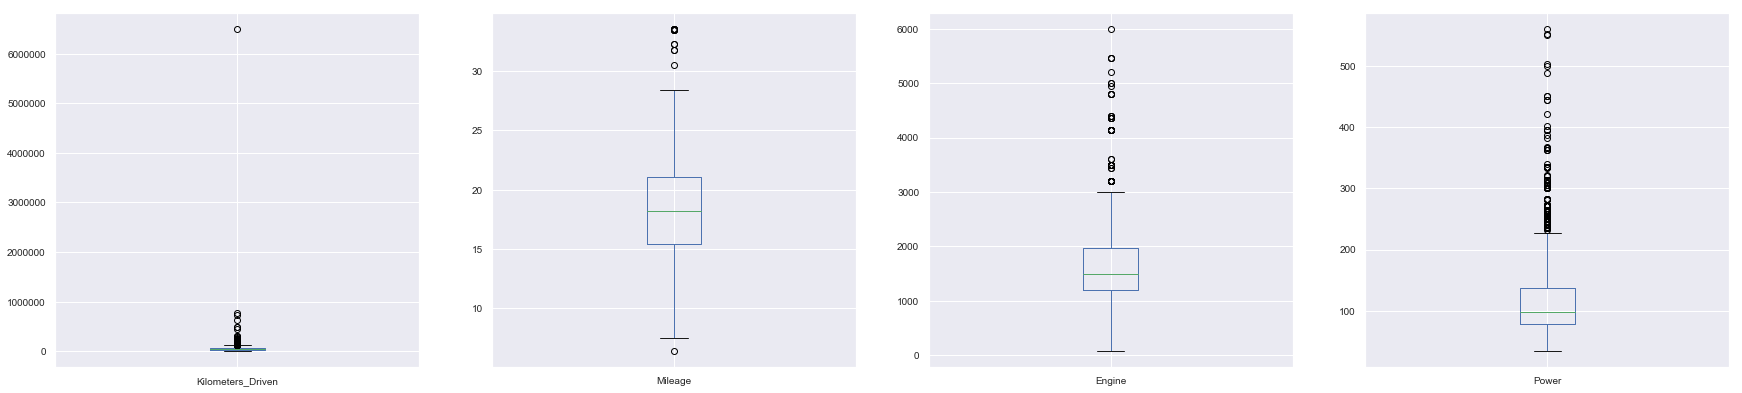

In [35]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

In [36]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage'
Q1 = data_continous.quantile(0.25)
Q2 = data_continous.quantile(0.5)
Q3 = data_continous.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  Kilometers_Driven    39000.00
Mileage                  5.70
Engine                 771.00
Power                   60.03
dtype: float64

Min :  Kilometers_Driven   -24500.00
Mileage                  6.85
Engine                  41.50
Power                  -12.05
dtype: float64

Q1 :  Kilometers_Driven    34000.0
Mileage                 15.4
Engine                1198.0
Power                   78.0
Name: 0.25, dtype: float64

Q2 :  Kilometers_Driven    53000.0
Mileage                 18.2
Engine                1493.0
Power                   97.7
Name: 0.5, dtype: float64

Q3 :  Kilometers_Driven    73000.00
Mileage                 21.10
Engine                1969.00
Power                  138.03
Name: 0.75, dtype: float64

Max :  Kilometers_Driven    131500.00
Mileage                  29.65
Engine                 3125.50
Power                   228.07
dtype: float64


In [37]:
#Check shape before removal of outliers
df_train_3.shape

(6019, 13)

In [38]:
#Take data backup before removal of outliers
df_train_4=df_train_3.copy()

In [39]:
#Remove Outliers
df_train_4 = df_train_4[~((df_train_4[['Kilometers_Driven','Power','Engine','Mileage']] < Min) | (df_train_4[['Kilometers_Driven','Power','Engine','Mileage']] > Max)).any(axis=1)]

In [40]:
#Check shape after removal of outliers
df_train_4.shape

(5549, 13)

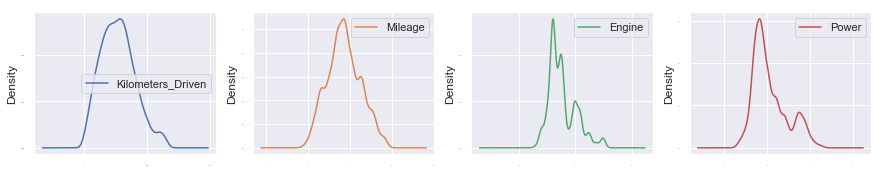

In [41]:
#Density Plot post outlier removal
data_continous = df_train_4[['Kilometers_Driven','Mileage','Engine','Power']]
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

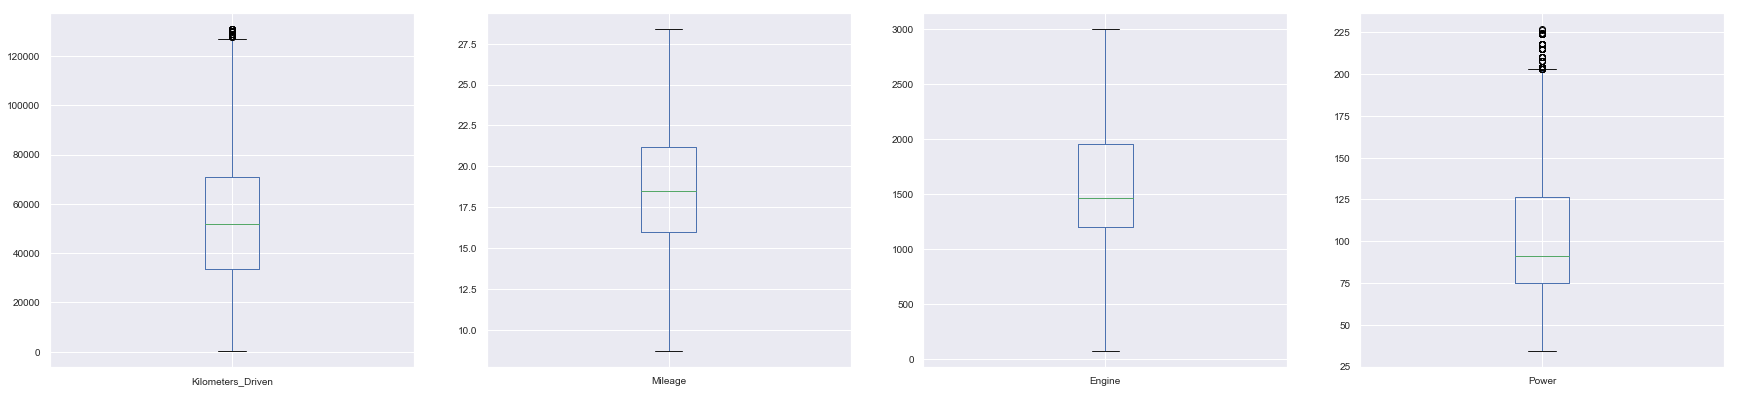

In [42]:
#Box_Plot post outlier removal
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

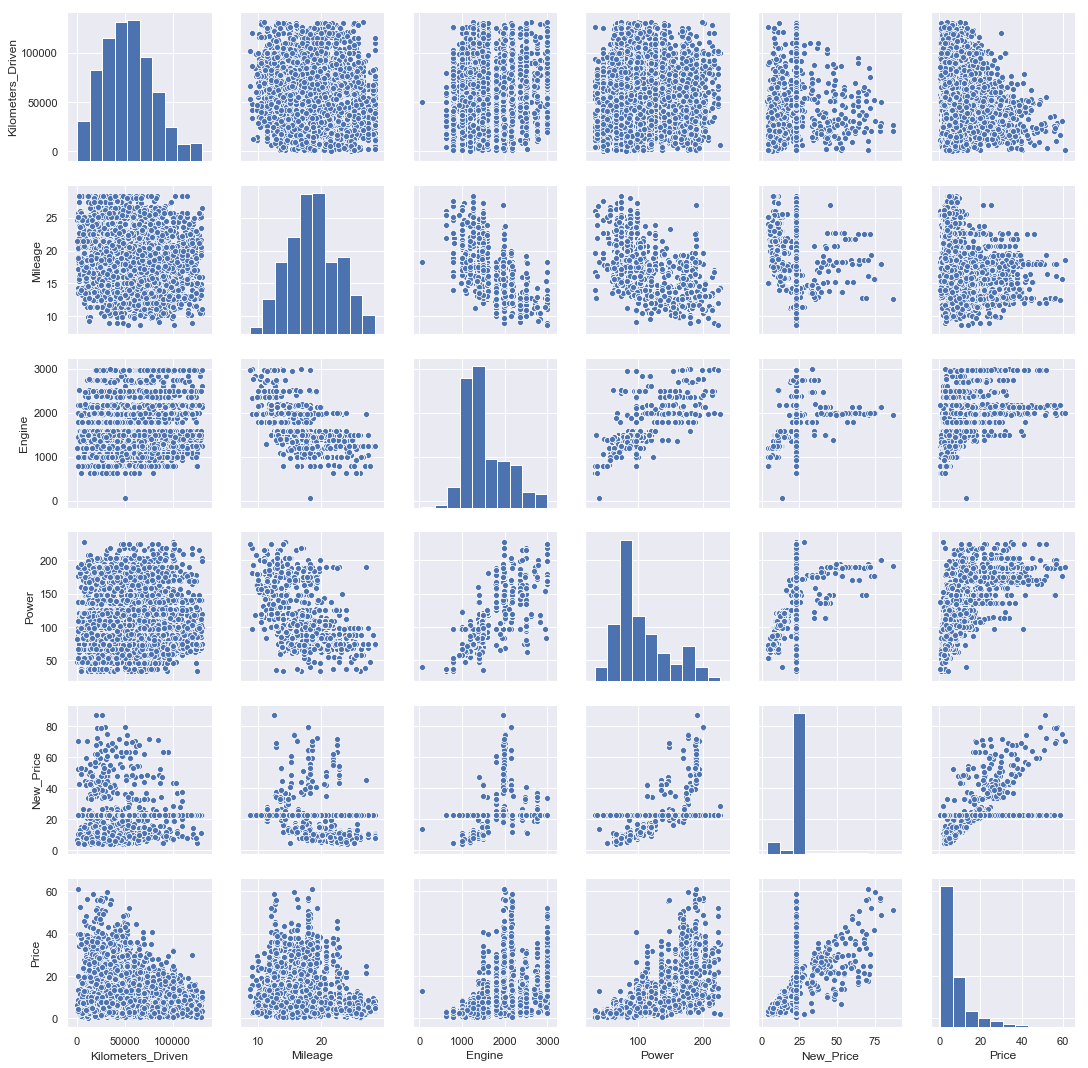

In [43]:
# Scatter plot matrix using seaborn library
data_continous['New_Price']=df_train_4.New_Price
data_continous['Price']=df_train_4.Price
sns.pairplot(data_continous)
plt.show()

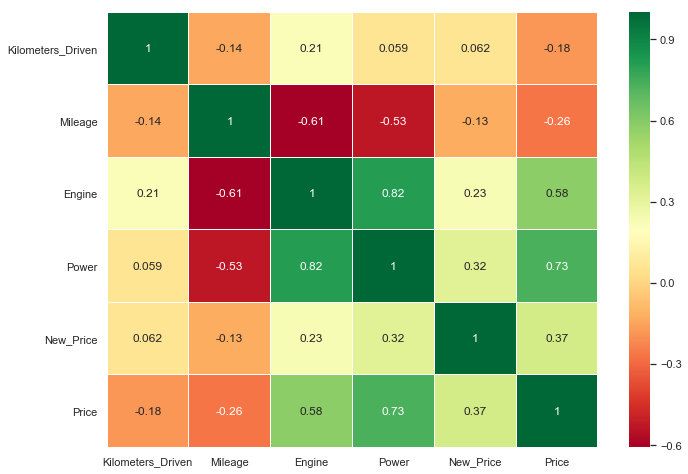

In [44]:
sns.heatmap(data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

#### After outlier removal, The data visvualization indicates, Engine (0.58) and Power (0.73) are moderalely corelated to Price

In [45]:
df_train_4.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Name,Location,Year,Fuel_Type,Transmission,Owner_Type
count,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00,5549.00
mean,53729.77,18.62,1538.67,105.80,5.25,22.55,8.20,922.92,5.65,15.46,2.43,0.74,0.36
std,26987.37,3.96,485.52,40.09,0.74,6.66,8.12,519.10,2.95,3.21,1.51,0.44,0.80
min,171.00,8.70,72.00,34.20,2.00,3.91,0.44,0.00,0.00,0.00,0.00,0.00,0.00
25%,33415.00,16.00,1197.00,75.00,5.00,23.08,3.46,499.00,3.00,14.00,1.00,0.00,0.00
50%,52000.00,18.50,1461.00,91.10,5.00,23.08,5.50,924.00,6.00,16.00,1.00,1.00,0.00
75%,70963.00,21.19,1950.00,126.20,5.00,23.08,9.00,1301.00,8.00,18.00,4.00,1.00,0.00
max,131000.00,28.40,2999.00,227.00,10.00,86.97,61.25,1875.00,10.00,21.00,4.00,1.00,3.00


In [46]:
train_y = df_train_4[['Price']]

## 4.3 Scaling/Normalization of Features

In [47]:
df_train_5 = df_train_4.copy()
df_test_4 = df_test_3.copy()

df_train_5 = df_train_5.drop(['Price'], axis = 1)

In [48]:
sc = StandardScaler()
df_train_arr_scld = sc.fit_transform(df_train_5)
df_train_5=pd.DataFrame(df_train_arr_scld, columns=df_train_5.columns)

df_test_arr_scld = sc.transform(df_test_4)
df_test_4=pd.DataFrame(df_test_arr_scld,columns=df_test_3.columns)

In [49]:
df_train_5.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Name,Location,Year,Fuel_Type,Transmission,Owner_Type
count,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03,5.55e+03
mean,8.26e-17,-6.89e-17,-1.88e-17,-9.05e-17,-8.42e-16,1.33e-15,-8.36e-18,-1.38e-16,-1.62e-16,3.06e-16,1.47e-16,6.25e-16
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.98e+00,-2.51e+00,-3.02e+00,-1.79e+00,-4.39e+00,-2.80e+00,-1.78e+00,-1.92e+00,-4.82e+00,-1.61e+00,-1.69e+00,-4.53e-01
25%,-7.53e-01,-6.63e-01,-7.04e-01,-7.68e-01,-3.41e-01,7.96e-02,-8.17e-01,-9.00e-01,-4.56e-01,-9.50e-01,-1.69e+00,-4.53e-01
50%,-6.41e-02,-3.14e-02,-1.60e-01,-3.67e-01,-3.41e-01,7.96e-02,2.09e-03,1.18e-01,1.67e-01,-9.50e-01,5.93e-01,-4.53e-01
75%,6.39e-01,6.48e-01,8.47e-01,5.09e-01,-3.41e-01,7.96e-02,7.28e-01,7.96e-01,7.91e-01,1.04e+00,5.93e-01,-4.53e-01
max,2.86e+00,2.47e+00,3.01e+00,3.02e+00,6.40e+00,9.67e+00,1.83e+00,1.47e+00,1.73e+00,1.04e+00,5.93e-01,3.28e+00


# 5. Data Visvualization

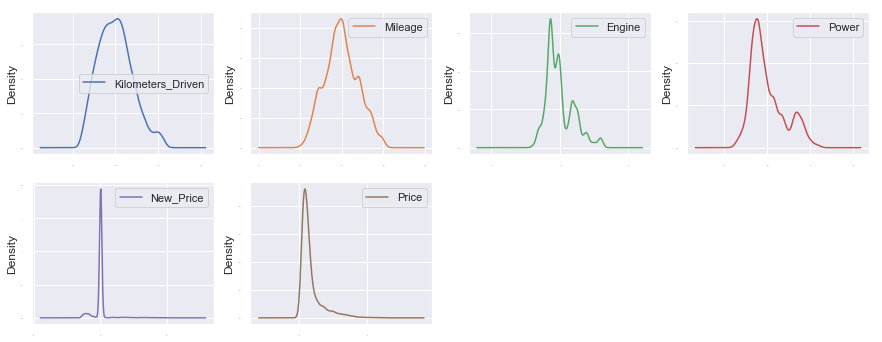

In [50]:
data_continous = df_train_5[['Kilometers_Driven','Mileage','Engine','Power','New_Price']]
data_continous['Price']=df_train_4.Price
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

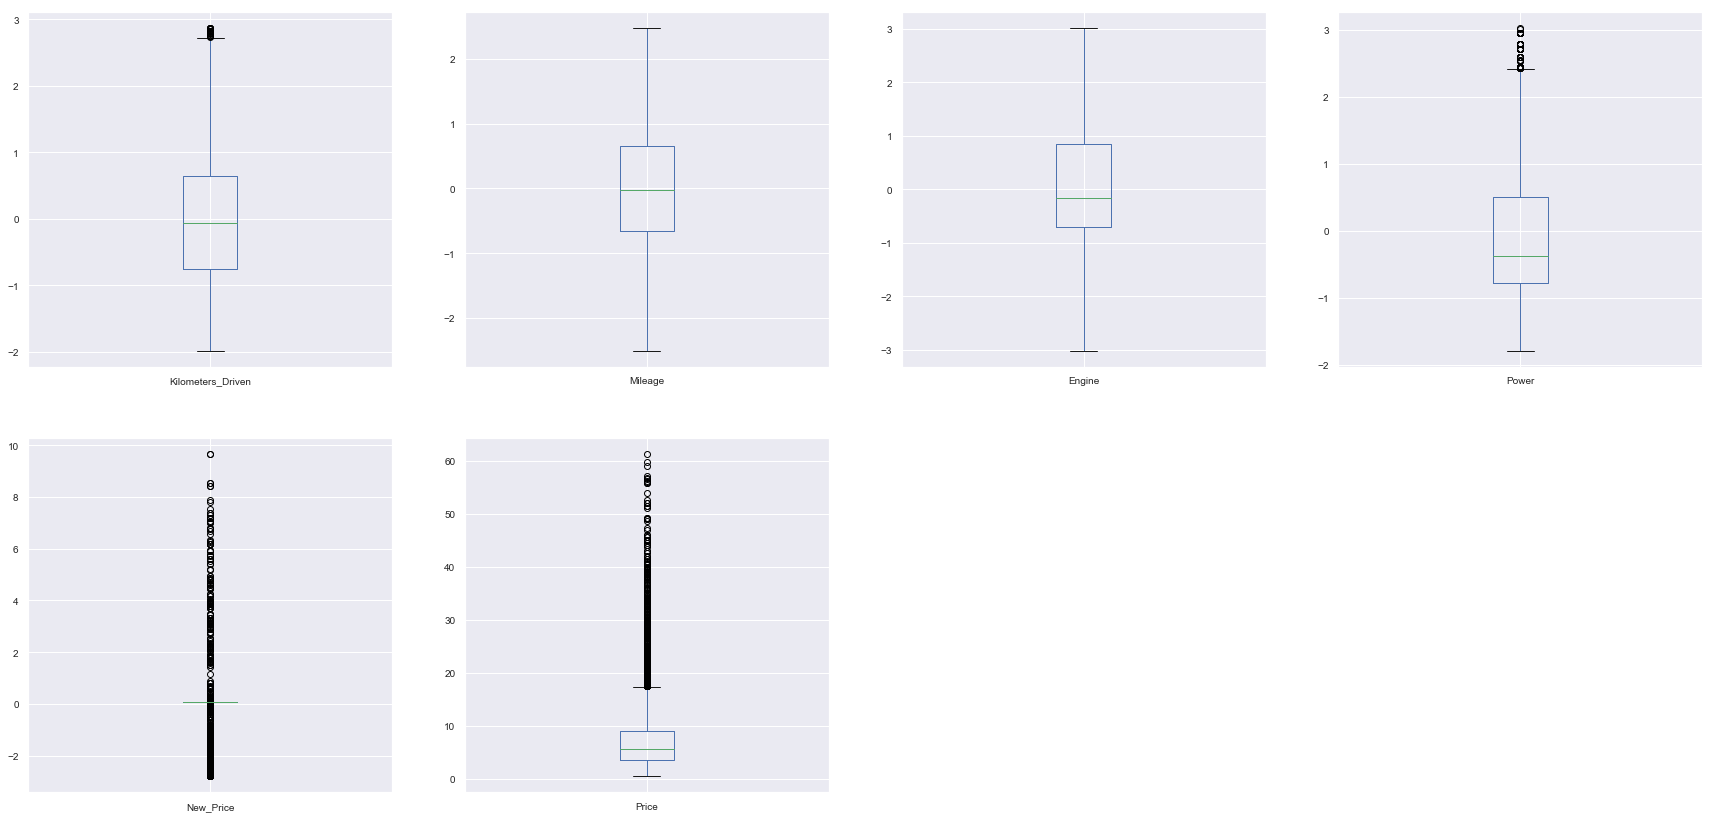

In [51]:
#Box_Plot
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

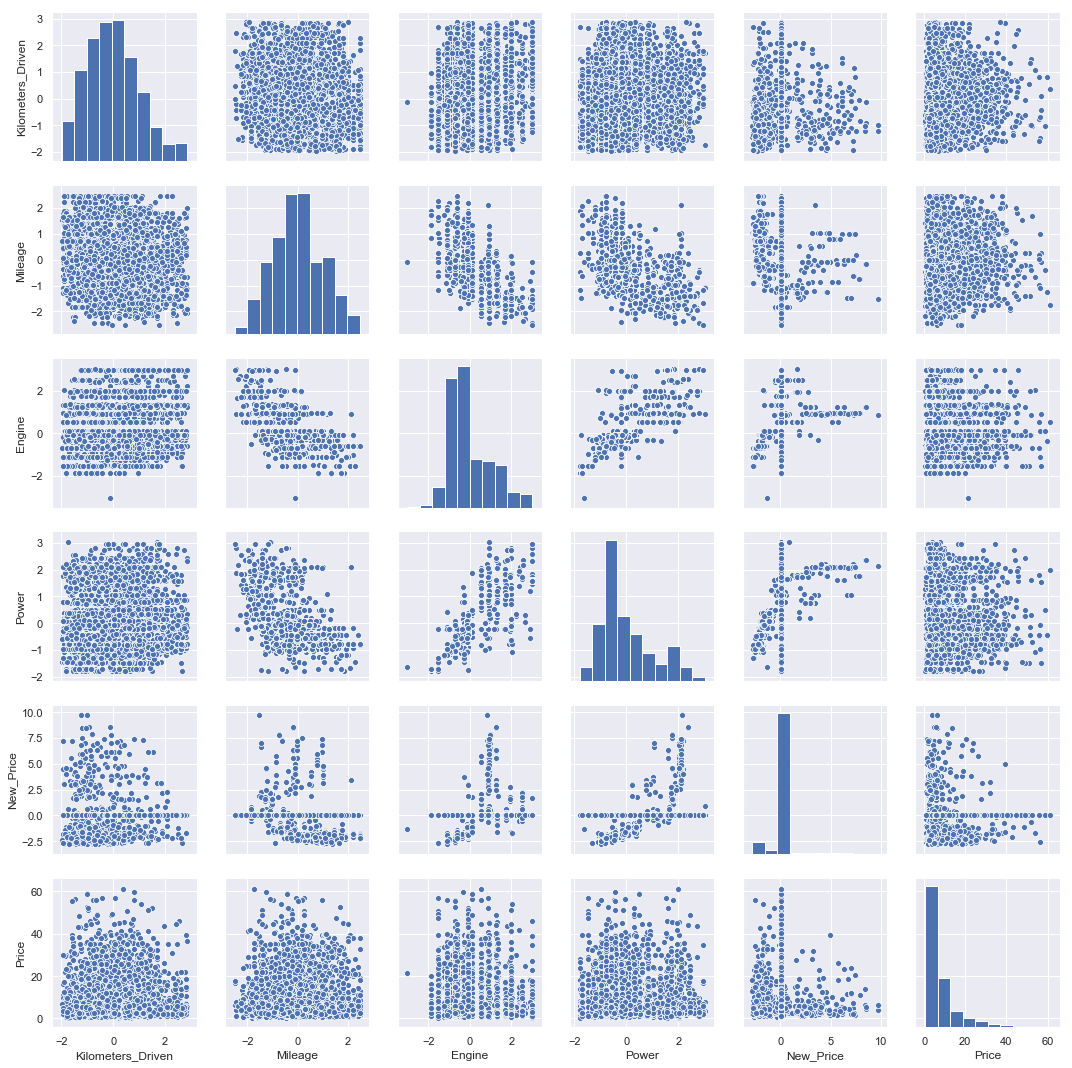

In [52]:
# Scatter plot matrix using seaborn library
sns.pairplot(data_continous)
plt.show()

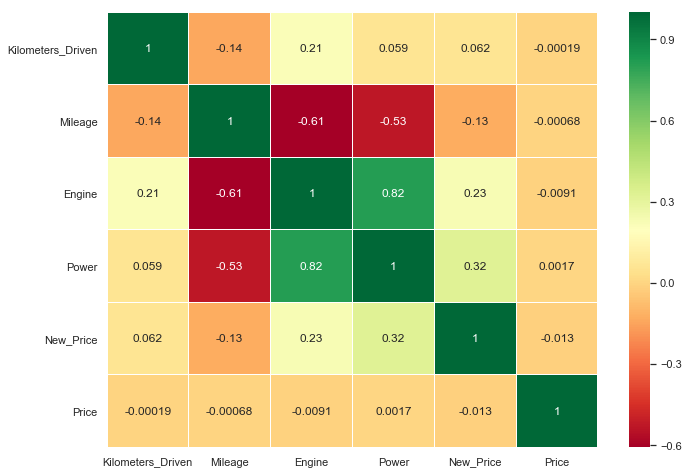

In [53]:
#Heat map of all continuous variables, ignored the categorical variables
sns.heatmap(data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

In [54]:
df_train.shape, df_train_2.shape, df_train_3.shape, df_train_4.shape, df_train_5.shape

((6019, 13), (6019, 13), (6019, 13), (5549, 13), (5549, 12))

## 6. Model Building, Predicting and Evaluation

In [55]:
train_x = df_train_5
train_y = train_y

In [56]:
train_x.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'],
      dtype='object')

In [57]:
train_y.columns

Index(['Price'], dtype='object')

## 6.1 RandomForestRegressor

In [58]:
#Train Test Split on the Train dataset
seed = 15
test_size = 0.3
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, test_size = test_size, random_state = seed)

#### 6.1.1 RandomForestRegressor without any hyperparameters, i.e Default paramters

In [59]:
reg = RandomForestRegressor()
reg.fit(X_train,  Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('RandomForestRegressor Train RMSE: ', train_RMSE)
print('RandomForestRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

RandomForestRegressor Train RMSE:  1.114838475221689
RandomForestRegressor Validation RMSE:  2.3383413917592133
Score for Train Data:  0.9817367995420243
Score for Validation Data:  0.9104093288743812


In [61]:
#Using Cross Validation
scores = cross_val_score(reg, train_x, train_y, cv=10)

scores

array([0.93372559, 0.93635773, 0.87048755, 0.92053122, 0.92962305,
       0.86958559, 0.91706786, 0.93192155, 0.88905614, 0.92113377])

In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.05)


#### 6.1.2 RandomForestRegressor with hyperparameters

In [63]:
#Finding optimal parameters via grid_search
reg = RandomForestRegressor()
param_dist = {"max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "max_depth": [2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": sp_randint(2, 10),
              "n_estimators" : sp_randint(1, 40)}

n_iter_search = 40
random_search = RandomizedSearchCV(reg, param_distributions=param_dist, cv=10,
                                   n_iter=n_iter_search)
random_search.fit(train_x,train_y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=None,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CD644C908>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CD644CB00>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CD644CC88>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CD644CE10>},
          pre_d

In [64]:
random_search.best_params_

{'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 35}

In [79]:
reg = RandomForestRegressor(n_estimators=35,min_samples_split=15,max_features=7,max_depth=9,min_samples_leaf=2)
reg.fit(X_train,  Y_train)

reg_temp = cp.deepcopy(reg) #After all analysis, this turns out to be the model with highest accuracy, hence keeping a copy of it

In [66]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('RandomForestRegressor Train RMSE: ', train_RMSE)
print('RandomForestRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

RandomForestRegressor Train RMSE:  2.006798041242104
RandomForestRegressor Validation RMSE:  2.382886201618097
Score for Train Data:  0.9408219942613951
Score for Validation Data:  0.9069634579828044


In [67]:
scores = cross_val_score(reg, train_x, train_y, cv=10)

scores

array([0.91771969, 0.91873623, 0.85158399, 0.92028001, 0.93387745,
       0.86794325, 0.90491557, 0.91454728, 0.8872064 , 0.92078408])

In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.05)


## 6.2 KNeighborsRegressor

#### 6.1.1 KNNRegressor without any hyperparameters

In [69]:
reg = KNeighborsRegressor()
reg.fit(X_train,  Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [70]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('KNeighborsRegressor Train RMSE: ', train_RMSE)
print('KNeighborsRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

KNeighborsRegressor Train RMSE:  2.514216076002222
KNeighborsRegressor Validation RMSE:  2.6075182973223545
Score for Train Data:  0.907112304873321
Score for Validation Data:  0.8885957691628754


In [71]:
scores = cross_val_score(reg, train_x, train_y, cv=10)

scores

array([0.89311199, 0.87610799, 0.80563353, 0.84881696, 0.91880011,
       0.81859742, 0.88038533, 0.87510962, 0.8215451 , 0.8846136 ])

In [72]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.07)


#### 6.1.2 KNNRegressor with hyperparameters

In [73]:
k_range = range(5,15)

for k in k_range:
    reg = KNeighborsRegressor(k)
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_val_pred = reg.predict(X_val)

    train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
    print("For K value : ",k)
    print("---------------------------------------------------")
    print('KNeighborsRegressor Train RMSE: ', train_RMSE)
    print('KNeighborsRegressor Validation RMSE: ', val_RMSE)
    print('KNeighborsRegressor: Test RMSE - Validation RMSE: ', train_RMSE-val_RMSE)
    print("\n")
    print('Score for Train Data: ', reg.score(X_train,Y_train))
    print('Score for Validation Data: ', reg.score(X_val,Y_val))
    print("\n")

For K value :  5
---------------------------------------------------
KNeighborsRegressor Train RMSE:  2.514216076002222
KNeighborsRegressor Validation RMSE:  2.6075182973223545
KNeighborsRegressor: Test RMSE - Validation RMSE:  -0.09330222132013244


Score for Train Data:  0.907112304873321
Score for Validation Data:  0.8885957691628754


For K value :  6
---------------------------------------------------
KNeighborsRegressor Train RMSE:  2.6154791668393633
KNeighborsRegressor Validation RMSE:  2.6461198619217896
KNeighborsRegressor: Test RMSE - Validation RMSE:  -0.030640695082426284


Score for Train Data:  0.8994792966170713
Score for Validation Data:  0.8852729093382836


For K value :  7
---------------------------------------------------
KNeighborsRegressor Train RMSE:  2.738002885990975
KNeighborsRegressor Validation RMSE:  2.686233126449401
KNeighborsRegressor: Test RMSE - Validation RMSE:  0.051769759541574256


Score for Train Data:  0.8898407953027492
Score for Validation Da

In [74]:
reg = KNeighborsRegressor(7)
reg.fit(X_train,  Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [75]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('KNeighborsRegressor Train RMSE: ', train_RMSE)
print('KNeighborsRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

KNeighborsRegressor Train RMSE:  2.738002885990975
KNeighborsRegressor Validation RMSE:  2.686233126449401
Score for Train Data:  0.8898407953027492
Score for Validation Data:  0.8817681850874768


In [76]:
scores = cross_val_score(reg, train_x, train_y, cv=10)

scores

array([0.89011658, 0.87584892, 0.79387844, 0.84388071, 0.91562636,
       0.82746209, 0.88286027, 0.87606125, 0.82013108, 0.88164744])

In [77]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.07)


# 7. Conclusion

#### We observe that, among the 2 models implemented (KNNRegressor and RandomForestRegressor), RandomForestRegressor performs well on the provided dataset with accuracy of 91% (+/- 0.05)

##### Optional -Start : Prediction of Price for the Test dataset using RandomForestRegressor as per above comments

In [78]:
Y_test_pred=reg_temp.predict(df_test_4)
Y_test_pred

array([ 2.31226107,  2.47108884, 17.80349482, ...,  2.6442426 ,
        3.42495062, 13.57029528])

##### Optional -End